# From Regression to Neural Networks

### Introduction
This notebook explores the fundamental building blocks of neural networks: neurons and layers. The primary objective is to demonstrate how a single neuron can replicate the functions of both linear and logistic regression models. By understanding these parallels, we can build a strong intuition for how more complex neural networks operate.

In [1]:
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

## 1. Neuron as Linear Regression
A single neuron without a non-linear activation function behaves exactly like a linear regression model. The neuron's output is a simple linear combination of its inputs, weights, and bias, represented by the equation: 
$$ f_{w,b}(x) = w \cdot x + b $$

### Data Loading and Exploration
We'll start with a simple dataset representing house prices, with the size of the house as our single feature.

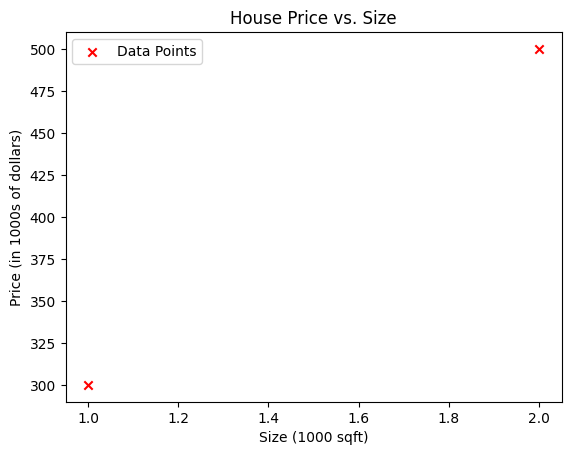

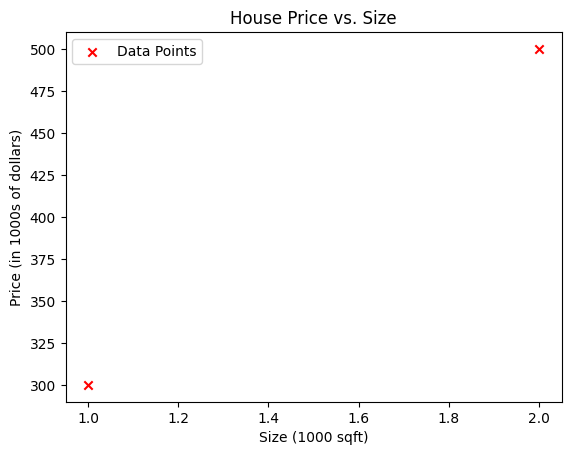

In [2]:
# Create the dataset for linear regression
X_train_linear = np.array([[1.0], [2.0]], dtype=np.float32)  # Size in 1000 sqft
y_train_linear = np.array([[300.0], [500.0]], dtype=np.float32) # Price in 1000s of dollars

# Plot the data points
plt.scatter(X_train_linear, y_train_linear, marker='x', c='r', label='Data Points')
plt.title('House Price vs. Size')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()
plt.show()

## Model Implementation with NumPy

Now, we will build the neural network's forward propagation logic using NumPy. This will provide a clear view of the underlying mathematical operations.


In [3]:
# Manually set the weights and bias
w_linear = np.array([[200]], dtype=np.float32)
b_linear = np.array([100], dtype=np.float32)

# Linear Layer with only linear activation
def dense_linear(X, W, b):
    return np.dot(X, W) + b

# Linear  prediction
prediction = dense_linear(X_train_linear, w_linear, b_linear)

print("Linear Simple Neuron Prediction:")
print(prediction)

Linear Simple Neuron Prediction:
[[300.]
 [500.]]


Linear Simple Neuron Prediction:
[[300.]
 [500.]]


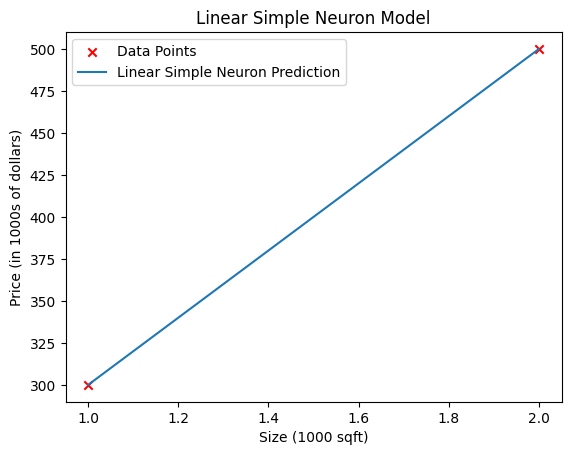

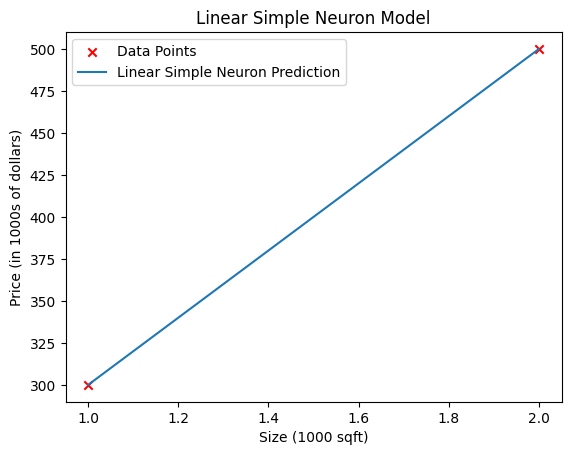

In [4]:
# Plot
plt.scatter(X_train_linear, y_train_linear, marker='x', c='r', label='Data Points')
plt.plot(X_train_linear, prediction, label='Linear Simple Neuron Prediction')
plt.title('Linear Simple Neuron Model')
plt.xlabel('Size (1000 sqft)')
plt.ylabel('Price (in 1000s of dollars)')
plt.legend()
plt.show()

## 2. Neuron as Logistic Regression
By adding a sigmoid activation function to the neuron, it becomes equivalent to a logistic regression model. The function is now:
$$ f_{w,b}(x) = g(w \cdot x + b) \quad \text{where} \quad g(z) = \frac{1}{1 + e^{-z}} $$

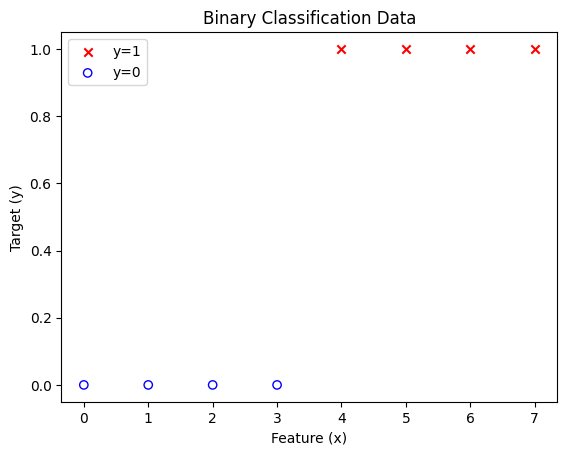

In [7]:
# Create the dataset for logistic regression
X_train_logistic = np.array([0, 1, 2, 3, 4, 5, 6, 7], dtype=np.float32).reshape(-1,1)
y_train_logistic = np.array([0,  0, 0, 0, 1, 1, 1,1], dtype=np.float32).reshape(-1,1)

# Plot the data points
pos = y_train_logistic == 1
neg = y_train_logistic == 0
plt.scatter(X_train_logistic[pos], y_train_logistic[pos], marker='x', c='r', label='y=1')
plt.scatter(X_train_logistic[neg], y_train_logistic[neg], marker='o', facecolors='none', edgecolors='b', label='y=0')
plt.title('Binary Classification Data')
plt.xlabel('Feature (x)')
plt.ylabel('Target (y)')
plt.legend()
plt.show()

In [8]:
# Boolean mask for all training examples labeled as positive (class = 1)
pos = y_train_logistic == 1

# Boolean mask for all training examples labeled as negative (class = 0)
neg = y_train_logistic == 0

# Manually chosen weights
w_logistic = np.array([[2.0]], dtype=np.float32)
b_logistic = np.array([-4.5], dtype=np.float32)

# Sigmoid activation
def sigmoid_np(z):
    z = np.clip(z, -709, 709)   # prevents exp overflow
    return 1.0 / (1.0 + np.exp(-z))

# Dense layer with sigmoid activation
def dense_logistic(X, W, B):
    z = np.dot(X, W) + B
    return sigmoid_np(z)

# Prediction from our dense logistic neuron
prediction_np_logistic = dense_logistic(X_train_logistic, w_logistic, b_logistic)

print("Dense Logistic Neuron Prediction (first 3):")
print(prediction_np_logistic[:3])


Dense Logistic Neuron Prediction (first 3):
[[0.01098694]
 [0.07585818]
 [0.37754068]]


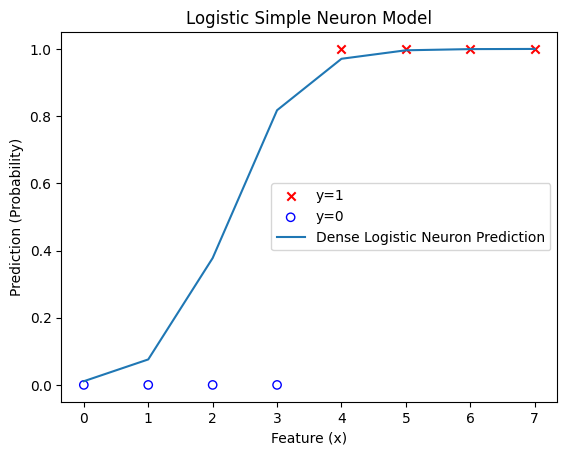

In [9]:
# Plot logistic curve
plt.scatter(X_train_logistic[pos], y_train_logistic[pos], marker='x', c='r', label='y=1')
plt.scatter(X_train_logistic[neg], y_train_logistic[neg], marker='o', facecolors='none', edgecolors='b', label='y=0')
plt.plot(X_train_logistic, prediction_np_logistic, label='Dense Logistic Neuron Prediction')
plt.title('Logistic Simple Neuron Model')
plt.xlabel('Feature (x)')
plt.ylabel('Prediction (Probability)')
plt.legend()
plt.show()

This notebook demonstrated that the fundamental units of neural networks: neurons are direct extensions of familiar models like linear and logistic regression. 

*   A neuron with a **linear activation** function is equivalent to **linear regression**.
*   A neuron with a **sigmoid activation** function is equivalent to **logistic regression**.

Understanding this connection is key to grasping how neural networks learn and make predictions. The next logical step would be to stack these neurons into layers and multiple layers into a deep neural network to solve more complex problems.